##  Introduction to project assignment
------
####  About Kickstarter 
Launched in 2009, Kickstarter has now became a world famous online crowdfunding platform. The platform mainly focus on creativity and merchandising, which has made some of the most fantastic ideas to come true.

The crowdfunding process is simple:
* Project owners propose their projects and provide related information such as idea, pricing, schedule, etc. 
* Backers back the projects that seems attractive

The purpose of this kernel is to  explore the data collected from Kickstarter, trying to understand some characteristics of the platform.

 Summary of the data


# Import packages
    

# Problem Statement
To predict if a kickstarter project will be successful or will fail before its actual deadline. Also identify the factors that determine the success rate of a project.



In [63]:
import sklearn
from sklearn import linear_model
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import f1_score
from sklearn.model_selection import RandomizedSearchCV 
from sklearn.model_selection import GridSearchCV
import squarify
import time
import matplotlib.pyplot as plt
%matplotlib inline
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import f1_score
from sklearn.model_selection import RandomizedSearchCV 
from sklearn.model_selection import GridSearchCV
import numpy as np
import pandas as pd
import seaborn as sns

import os


--------

## Handling weird values
- 

In [2]:
df= pd.read_csv('ks-projects-201801.csv', sep=',')
df.head()

,ID,name,category,main_category,currency,deadline,goal,launched,pledged,state,backers,country,usd pledged,usd_pledged_real,usd_goal_real
0,1000002330,The Songs of Adelaide & Abullah,Poetry,Publishing,GBP,2015-10-09,1000.0,2015-08-11 12:12:28,0.0,failed,0,GB,0.0,0.0,1533.95
1,1000003930,Greeting From Earth: ZGAC Arts Capsule For ET,Narrative Film,Film & Video,USD,2017-11-01,30000.0,2017-09-02 04:43:57,2421.0,failed,15,US,100.0,2421.0,30000.00
2,1000004038,Where is Hank?,Narrative Film,Film & Video,USD,2013-02-26,45000.0,2013-01-12 00:20:50,220.0,failed,3,US,220.0,220.0,45000.00
3,1000007540,ToshiCapital Rekordz Needs Help to Complete Album,Music,Music,USD,2012-04-16,5000.0,2012-03-17 03:24:11,1.0,failed,1,US,1.0,1.0,5000.00
4,1000011046,Community Film Project: The Art of Neighborhoo...,Film & Video,Film & Video,USD,2015-08-29,19500.0,2015-07-04 08:35:03,1283.0,canceled,14,US,1283.0,1283.0,19500.00


In [3]:
df.describe()

,ID,goal,pledged,backers,usd pledged,usd_pledged_real,usd_goal_real
count,3.786610e+05,3.786610e+05,3.786610e+05,378661.000000,3.748640e+05,3.786610e+05,3.786610e+05
mean,1.074731e+09,4.908079e+04,9.682979e+03,105.617476,7.036729e+03,9.058924e+03,4.545440e+04
std,6.190862e+08,1.183391e+06,9.563601e+04,907.185035,7.863975e+04,9.097334e+04,1.152950e+06
min,5.971000e+03,1.000000e-02,0.000000e+00,0.000000,0.000000e+00,0.000000e+00,1.000000e-02
25%,5.382635e+08,2.000000e+03,3.000000e+01,2.000000,1.698000e+01,3.100000e+01,2.000000e+03
50%,1.075276e+09,5.200000e+03,6.200000e+02,12.000000,3.947200e+02,6.243300e+02,5.500000e+03
75%,1.610149e+09,1.600000e+04,4.076000e+03,56.000000,3.034090e+03,4.050000e+03,1.550000e+04
max,2.147476e+09,1.000000e+08,2.033899e+07,219382.000000,2.033899e+07,2.033899e+07,1.663614e+08


In [4]:
df.isnull().sum()

ID                     0
name                   4
category               0
main_category          0
currency               0
deadline               0
goal                   0
launched               0
pledged                0
state                  0
backers                0
country                0
usd pledged         3797
usd_pledged_real       0
usd_goal_real          0
dtype: int64

According to the description of data:


We will use **usd_pledged_real** for further analysis

In [5]:

df[pd.isnull(df['name'])].index

Int64Index([166851, 307234, 309991, 338931], dtype='int64')

In [6]:

df[pd.isnull(df['name'])].index

Int64Index([166851, 307234, 309991, 338931], dtype='int64')

In [7]:
df.groupby('main_category').sum().index

Index(['Art', 'Comics', 'Crafts', 'Dance', 'Design', 'Fashion', 'Film & Video',
       'Food', 'Games', 'Journalism', 'Music', 'Photography', 'Publishing',
       'Technology', 'Theater'],
      dtype='object', name='main_category')

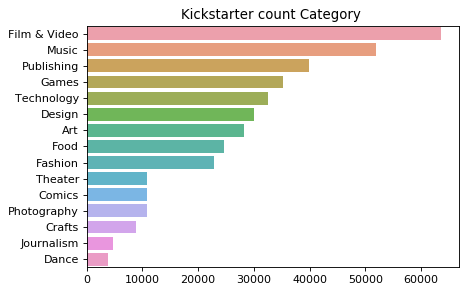

In [8]:
mains = df.main_category.value_counts().head(15)

x = mains.values
y = mains.index

fig = plt.figure(dpi=80)
ax = fig.add_subplot(111)
ax = sns.barplot(y=y, x=x, orient='k', alpha=0.9)

plt.title('Kickstarter count Category ')
plt.show()

In [9]:
df.groupby('main_category').sum().index

Index(['Art', 'Comics', 'Crafts', 'Dance', 'Design', 'Fashion', 'Film & Video',
       'Food', 'Games', 'Journalism', 'Music', 'Photography', 'Publishing',
       'Technology', 'Theater'],
      dtype='object', name='main_category')

Even though there are some missing values in **name**, those are real projects. We will keep them.

In [10]:
mains

Film & Video    63585
Music           51918
Publishing      39874
Games           35231
Technology      32569
Design          30070
Art             28153
Food            24602
Fashion         22816
Theater         10913
Comics          10819
Photography     10779
Crafts           8809
Journalism       4755
Dance            3768
Name: main_category, dtype: int64

In [11]:
df.groupby('category').sum().index

Index(['3D Printing', 'Academic', 'Accessories', 'Action', 'Animals',
       'Animation', 'Anthologies', 'Apparel', 'Apps', 'Architecture',
       ...
       'Wearables', 'Weaving', 'Web', 'Webcomics', 'Webseries', 'Woodworking',
       'Workshops', 'World Music', 'Young Adult', 'Zines'],
      dtype='object', name='category', length=159)

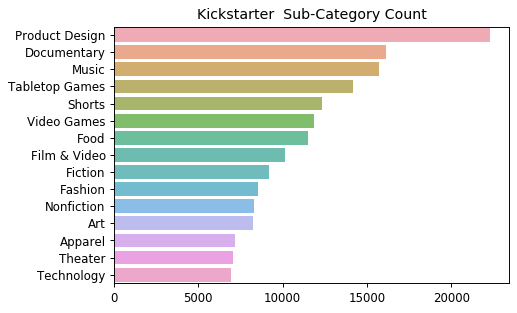

In [12]:
cats = df.category.value_counts().head(15)

x = cats.values
y = cats.index

fig = plt.figure(dpi=85)
ax = fig.add_subplot(111)
ax = sns.barplot(y=y, x=x, orient='k', alpha=0.8)

plt.title('Kickstarter  Sub-Category Count')
plt.show()

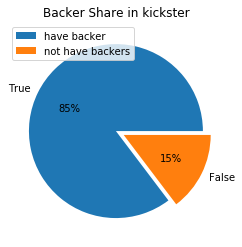

In [13]:
fig, ax = plt.subplots(1, 1)
(df.backers >=1).value_counts().plot.pie(autopct='%0.0f%%', 
                                         explode=[0,.1])

plt.ylabel('')
plt.title('Backer Share in kickster')
plt.legend(['have backer', 'not have backers'], loc=2)

plt.show()

# **EDA of Kickstarter Projects**

Kickstarter is an American public-benefit corporation based in Brooklyn, New York, that maintains a global crowdfunding platform focused on creativity and merchandising. The company's stated mission is to "help bring creative projects to life"

In this exploratory data analysis I will try to find out a few interesting insights.

# EDA

In [14]:

print(df.shape)

print(df.info())

print(df.describe())

print(df.nunique())

(378661, 15)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 378661 entries, 0 to 378660
Data columns (total 15 columns):
 #   Column            Non-Null Count   Dtype  
---  ------            --------------   -----  
 0   ID                378661 non-null  int64  
 1   name              378657 non-null  object 
 2   category          378661 non-null  object 
 3   main_category     378661 non-null  object 
 4   currency          378661 non-null  object 
 5   deadline          378661 non-null  object 
 6   goal              378661 non-null  float64
 7   launched          378661 non-null  object 
 8   pledged           378661 non-null  float64
 9   state             378661 non-null  object 
 10  backers           378661 non-null  int64  
 11  country           378661 non-null  object 
 12  usd pledged       374864 non-null  float64
 13  usd_pledged_real  378661 non-null  float64
 14  usd_goal_real     378661 non-null  float64
dtypes: float64(5), int64(2), object(8)
memory usage: 43.3+ 

#Modify data columns
-

In [15]:
# Delete usdf pledged column
df.drop(['usd pledged'], axis = 1)

,ID,name,category,main_category,currency,deadline,goal,launched,pledged,state,backers,country,usd_pledged_real,usd_goal_real
0,1000002330,The Songs of Adelaide & Abullah,Poetry,Publishing,GBP,2015-10-09,1000.0,2015-08-11 12:12:28,0.0,failed,0,GB,0.0,1533.95
1,1000003930,Greeting From Earth: ZGAC Arts Capsule For ET,Narrative Film,Film & Video,USD,2017-11-01,30000.0,2017-09-02 04:43:57,2421.0,failed,15,US,2421.0,30000.00
2,1000004038,Where is Hank?,Narrative Film,Film & Video,USD,2013-02-26,45000.0,2013-01-12 00:20:50,220.0,failed,3,US,220.0,45000.00
3,1000007540,ToshiCapital Rekordz Needs Help to Complete Album,Music,Music,USD,2012-04-16,5000.0,2012-03-17 03:24:11,1.0,failed,1,US,1.0,5000.00
4,1000011046,Community Film Project: The Art of Neighborhoo...,Film & Video,Film & Video,USD,2015-08-29,19500.0,2015-07-04 08:35:03,1283.0,canceled,14,US,1283.0,19500.00
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
378656,999976400,ChknTruk Nationwide Charity Drive 2014 (Canceled),Documentary,Film & Video,USD,2014-10-17,50000.0,2014-09-17 02:35:30,25.0,canceled,1,US,25.0,50000.00
378657,999977640,The Tribe,Narrative Film,Film & Video,USD,2011-07-19,1500.0,2011-06-22 03:35:14,155.0,failed,5,US,155.0,1500.00
378658,999986353,Walls of Remedy- New lesbian Romantic Comedy f...,Narrative Film,Film & Video,USD,2010-08-16,15000.0,2010-07-01 19:40:30,20.0,failed,1,US,20.0,15000.00
378659,999987933,BioDefense Education Kit,Technology,Technology,USD,2016-02-13,15000.0,2016-01-13 18:13:53,200.0,failed,6,US,200.0,15000.00


In [16]:
# Add pledged_ratio column
df['pledged_ratio'] = df['usd_pledged_real']/ df['usd_goal_real']

In [17]:
def year_cut(string):
    return string[0:4]

def month_cut(string):
    return string[5:7]

df['year'] = df['launched'].apply(year_cut)
df['month'] = df['launched'].apply(month_cut)

df['year'] = df['year'].astype(int)
df['month'] = df['month'].astype(int)
df['time'] = (df['year'].values - 2009)*12 + (df['month']).astype(int)

In [18]:
print (df.columns)

Index(['ID', 'name', 'category', 'main_category', 'currency', 'deadline',
       'goal', 'launched', 'pledged', 'state', 'backers', 'country',
       'usd pledged', 'usd_pledged_real', 'usd_goal_real', 'pledged_ratio',
       'year', 'month', 'time'],
      dtype='object')


In [19]:
df['year'].value_counts()

2015    77300
2014    67745
2016    57184
2017    52200
2013    44851
2012    41165
2011    26237
2010    10519
2009     1329
2018      124
1970        7
Name: year, dtype: int64

In [20]:
df_year = {}
for year in range(2009, 2019):
    df_year[year] = df[df['year'] == year]['year'].count()

# Number of projects proposed/  successful rate
-

In [21]:
df['state'].value_counts()

failed        197719
successful    133956
canceled       38779
undefined       3562
live            2799
suspended       1846
Name: state, dtype: int64

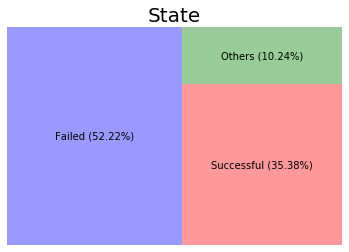

In [22]:
squarify.plot(sizes=[197719,133956, (38779 + 3562 + 2799 + 1846)], 
              label=["Failed (52.22%)", "Successful (35.38%)", "Others (10.24%)",], color=["blue","red","green"], alpha=.4 )
plt.title('State', fontsize = 20)
plt.axis('off')
plt.show()

In [23]:
success_timely = []

for year in range(2009, 2019):
    success = len (df[(df['year'] == year) & (df['state'] == 'successful')]['state'])
    overall = len (df[df['year'] == year]['year'])
    ratio = success/ overall
    success_timely.append(ratio)
    print ("Year = ",year, ratio * 100, '%')

Year =  2009 43.566591422121896 %
Year =  2010 43.66384637322939 %
Year =  2011 46.38868773106681 %
Year =  2012 43.46410785861776 %
Year =  2013 43.28777507747876 %
Year =  2014 31.156542918296555 %
Year =  2015 27.129366106080205 %
Year =  2016 32.81687185226637 %
Year =  2017 35.367816091954026 %
Year =  2018 0.0 %


In [24]:
df[df['year'] == 2018]['state'].value_counts()

live        122
canceled      2
Name: state, dtype: int64

In [25]:
df_year

{2009: 1329,
 2010: 10519,
 2011: 26237,
 2012: 41165,
 2013: 44851,
 2014: 67745,
 2015: 77300,
 2016: 57184,
 2017: 52200,
 2018: 124}

#Statistics of pledged amount


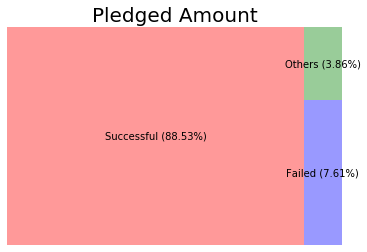

In [26]:
squarify.plot(sizes=[3036889045.99, 261108466.05, 132263736.79], 
              label=["Successful (88.53%)", "Failed (7.61%)", "Others (3.86%)",], color=["red","blue", "green"], alpha=.4 )
plt.title('Pledged Amount', fontsize = 20)
plt.axis('off')
plt.show()

In [27]:
df['country'].value_counts()

US      292627
GB       33672
CA       14756
AU        7839
DE        4171
N,0"      3797
FR        2939
IT        2878
NL        2868
ES        2276
SE        1757
MX        1752
NZ        1447
DK        1113
IE         811
CH         761
NO         708
HK         618
BE         617
AT         597
SG         555
LU          62
JP          40
Name: country, dtype: int64

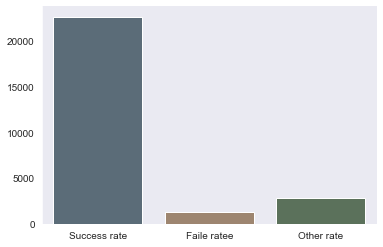

In [28]:
sns.set_style("dark")
sns.barplot(["Success rate", "Faile ratee", "Other rate"],
            y= [22670.7952312, 1320.60381678, 2814.96055825],
            saturation = 0.19)
sns.despine()

## 2. Region
- 2.1 Projects proposed across regions

In [29]:
df['country'].unique()

array(['GB', 'US', 'CA', 'AU', 'NO', 'IT', 'DE', 'IE', 'MX', 'ES', 'N,0"',
       'SE', 'FR', 'NL', 'NZ', 'CH', 'AT', 'DK', 'BE', 'HK', 'LU', 'SG',
       'JP'], dtype=object)

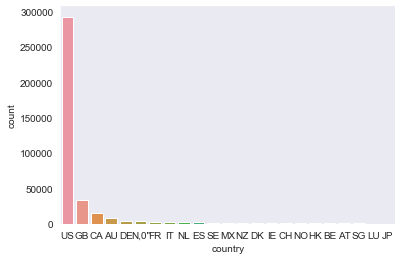

In [30]:
sns.countplot(df['country'], order = df['country'].value_counts().index)
sns.despine()


# Caterogy


Adding **pledged_sum**

In [31]:
pledged_sum = {}
for category in list(set(df['main_category'])):
    amount = df[df['main_category'] == category]['usd_pledged_real'].sum()
    pledged_sum[category] = amount

# Create dataframe
cate_df = pd.Series(pledged_sum)
cate_df = pd.DataFrame(cate_df)
cate_df = cate_df.rename(columns = {0:"pledged_sum"})

cate_df.head()

,pledged_sum
Music,2.003187e+08
Fashion,1.303353e+08
Dance,1.301070e+07
Publishing,1.335760e+08
Crafts,1.438428e+07


Adding **count**

In [32]:
cate_count = {}
for category in list(set(df['main_category'])):
    count = df[df['main_category'] == category]['main_category'].count()
    cate_count[category] = count
    
cate_df['count'] = pd.Series(cate_count)

cate_df.head()

,pledged_sum,count
Music,2.003187e+08,51918
Fashion,1.303353e+08,22816
Dance,1.301070e+07,3768
Publishing,1.335760e+08,39874
Crafts,1.438428e+07,8809


Adding **average_amount**

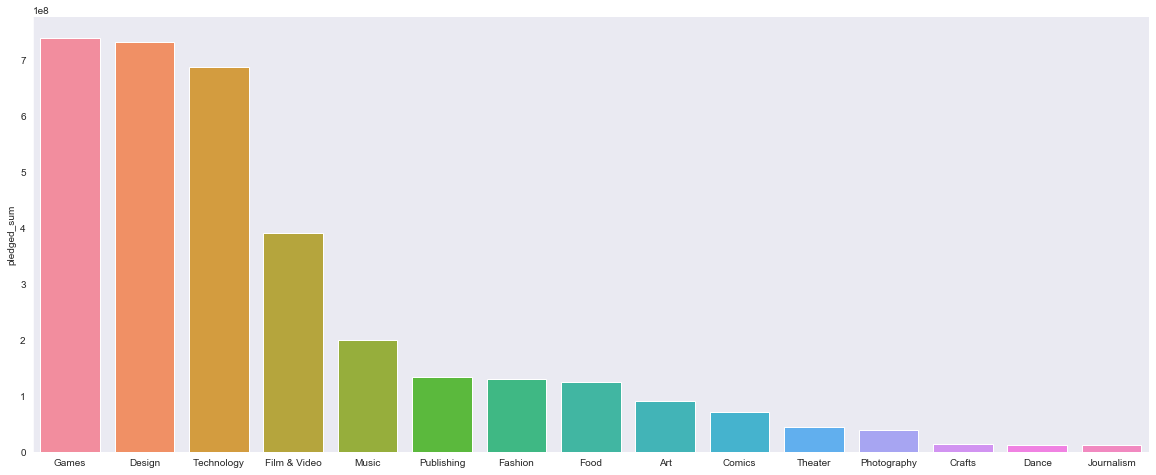

In [33]:

cate_df = cate_df.sort_values('pledged_sum',  ascending = False)
plt.subplots(figsize = (20,8))
sns.set_style("dark")
sns.barplot(cate_df['pledged_sum'].index, y= cate_df['pledged_sum'] ,saturation = 0.9)
sns.despine(right = True, top = True)

# Backer


In [34]:
back_cate = {}

for category in set(df['main_category']):
    backers = df[df['main_category'] == category]['backers'].sum()
    back_cate[category] = backers

backers = pd.Series(back_cate)
cate_df['backers'] = backers

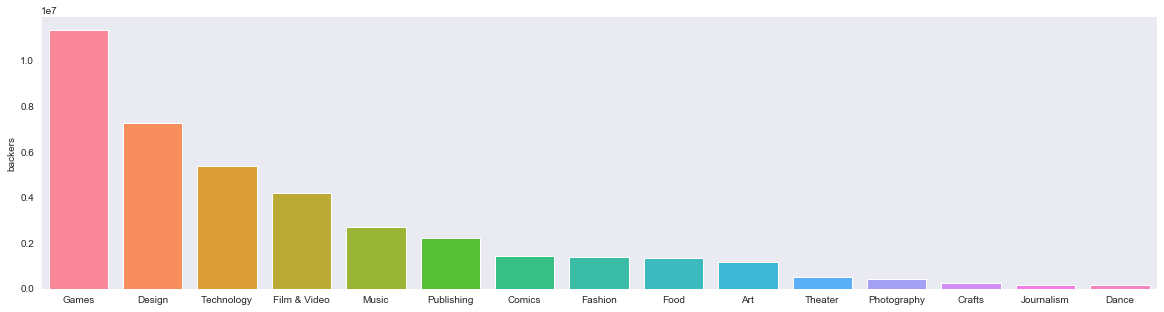

In [35]:
cate_df = cate_df.sort_values('backers',  ascending = False)
plt.subplots(figsize = (20,5))
sns.set_style("whitegrid")
sns.barplot(cate_df['backers'].index, y= cate_df['backers'],saturation = 2)
sns.despine()

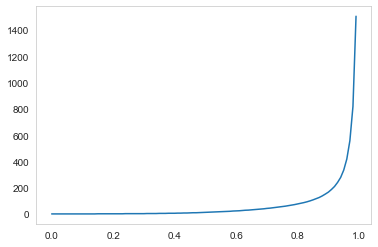

In [36]:
df['backers'].quantile(list(np.arange(0,1,0.01))).plot(grid = 0)

#Modeling


In [37]:

not_zeros = df[df['usd_pledged_real'] != 0]
print (not_zeros.shape)

(326134, 19)


In [38]:

X = df[df['usd_pledged_real'] != 0]['backers'].values
Y = df[df['usd_pledged_real'] != 0]['usd_pledged_real'].values

print (X.shape)
print (Y.shape)

(326134,)
(326134,)


In [39]:
X = X.reshape(326134,1)
Y = Y.reshape(326134,1)

In [40]:
print (df['state'].value_counts())
print ('')
print ("df.shape = ", df.shape)

failed        197719
successful    133956
canceled       38779
undefined       3562
live            2799
suspended       1846
Name: state, dtype: int64

df.shape =  (378661, 19)


In [41]:

def state_change(cell_value):
    if cell_value == 'successful':
        return 1
    
    elif cell_value == 'failed':
        return 0
    
    else:
        return 'del'

In [42]:
df['state'] = df['state'].apply(state_change)
print (df[df['state'] == 1].shape)
print (df[df['state'] == 0].shape)
print (df[df['state'] == 'del'].shape)
print (df[df['state'] == 1].shape[0] + df[df['state'] == 0].shape[0])

(133956, 19)
(197719, 19)
(46986, 19)
331675


In [43]:
df_rf = df.drop(df[df['state'] == 'del'].index)
print (df_rf.shape)

(331675, 19)


In [44]:
df_rf = pd.concat([
                  df_rf['main_category'],
                  df_rf['time'],
                  df_rf['state']], axis = 1
                 )

print (df_rf.shape)

(331675, 3)


Data
* Training 70%
* Testing 30%

In [45]:
train, test = sklearn.model_selection.train_test_split(df_rf, test_size = 0.3, random_state = 42)

print ("Train shape = ", train.shape, ",", len(train)/ len(df_rf) * 100, "%")
print ("Test shape = ", test.shape, ",", len(test)/ len(df_rf) * 100, "%")

Train shape =  (232172, 3) , 69.99984925001884 %
Test shape =  (99503, 3) , 30.00015074998116 %


Define X and Y

In [57]:
X_train = pd.concat(
    [
     pd.get_dummies(train['main_category'], prefix = 'main_category'),
     train["time"]
    ], axis=1)

Y_train = train['state']

In [58]:
X_test = pd.concat([ pd.get_dummies(test['main_category'], prefix = 'main_category'), test["time"]], axis=1)

Y_test = test['state']

In [67]:
Y_train=Y_train.astype('int')

Random Forest

In [68]:
start = time.time()
rf = RandomForestClassifier(random_state = 42)
rf.fit(X_train, Y_train)
end = time.time()
sec = end - start
Y_pred = rf.predict(X_train)

In [69]:
print(Y_pred)

[1 1 0 ... 0 1 1]


# **RESULT**
IF prediction is 0 man failed and if 1 than mean sucessfull